### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
# Reading the three different data sets into dataframes
ratings_data=pd.read_csv('Data.csv')
movie_data=pd.read_csv('item.csv')
user_data=pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [318]:
# Steps for Data.csv (ratings_data)
print(ratings_data.info())
print(ratings_data.shape)
print(ratings_data.describe())
print(ratings_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
(100000, 4)
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
user id      0
movie id   

In [319]:
# Steps for item.csv (movie_data)
print(movie_data.info())
print(movie_data.shape)
print(movie_data.describe())
print(movie_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [320]:
# Steps for user.csv (user_data)
print(user_data.info())
print(user_data.shape)
print(user_data.describe())
print(user_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
(943, 5)
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [321]:
movie_data2 = movie_data.drop(['movie id', 'movie title', 'release date'], axis=1) # drop operation to remove unwanted columns
movie_data2.sum() # Sum operation for finding sum of movie per genre

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

In [347]:
ans=movie_data.where(movie_data.iloc[:,4:].sum(axis=1)>1)['movie title'] # conditional statement to find locations of movies with sum of genre > 1
print("Movies with more than one genre: ")
ans2=ans.dropna() # Drop operation for null values
print(ans2) # movie with more than one genre

Movies with more than one genre: 
0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object


### 6. Drop the movie where the genre is unknown - 2.5 marks

In [348]:
print(movie_data.shape) # dataframe shape before drop
index2drop=movie_data[movie_data['unknown']==1].index # finding index of unknown genre to drop
movie_data.drop(index2drop,inplace=True)
movie_data.shape # checks for change in dataframe shape due to conditional drop

(1681, 22)


(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [3]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

<AxesSubplot:xlabel='age'>

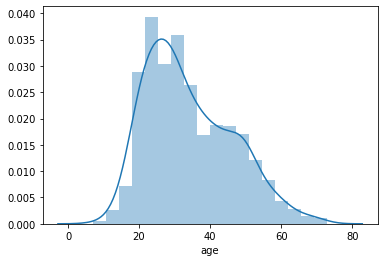

In [324]:
# age plot
sns.distplot(user_data["age"])

100000

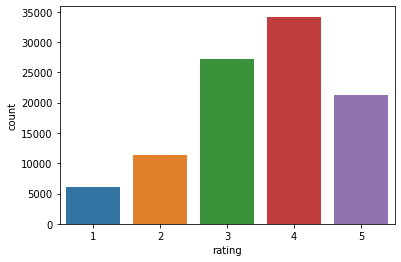

In [147]:
# ratings plot
sns.countplot(ratings_data["rating"])

<AxesSubplot:xlabel='gender', ylabel='count'>

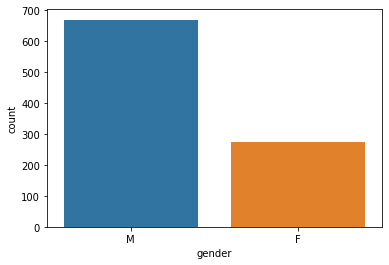

In [91]:
# gender plot
sns.countplot(user_data["gender"])

<AxesSubplot:xlabel='occupation', ylabel='count'>

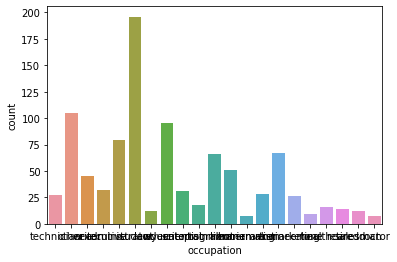

In [340]:
# occupation plot
sns.countplot(user_data["occupation"])

<AxesSubplot:ylabel='count'>

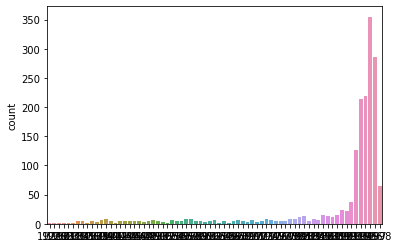

In [4]:
# release year
release_yr = movie_data['release date'].str.split('-')
a=list()
blen=len(release_yr)
for i in range(0,blen):
    a.append(release_yr[i][2])
sns.countplot(a)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

<AxesSubplot:ylabel='release year'>

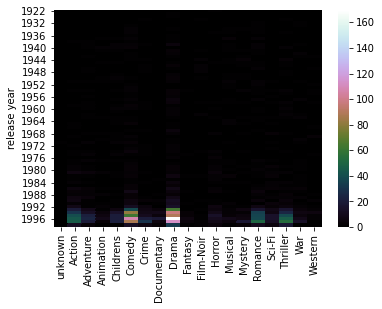

In [325]:
# Importing item csv file as movie_data dataframe 
movie_data=pd.read_csv('item.csv')

# Extracting release year in a list
release_yr = movie_data['release date'].str.split('-')
a=list() #initializing the list for release year
blen=len(release_yr)
for i in range(0,blen):
    a.append(release_yr[i][2])
movie_data['release year'] = a

# Extracting genre frequency using groupby and sum operations and making requisite dataframe for heatmap
grouped_data=movie_data.groupby('release year').sum()
grouped_data.drop('movie id', axis=1, inplace=True)

# Plotting genre frequency as heatmap
sns.heatmap(grouped_data, cmap='cubehelix')

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [326]:
# Merge and groupby operations to arrive to a dataframe with average ratings and number of ratings per movie
df1=pd.merge(movie_data, ratings_data, how='right', on=['movie id'])
grouped_data = df1.groupby('movie id')['rating'].mean().to_frame(name='average rating').reset_index()
grouped_data2 = df1.groupby('movie id')['rating'].count().to_frame(name='number of rating').reset_index()
grouped_data3 = pd.merge(grouped_data, grouped_data2, how='outer', on=['movie id'])

# own version of the isin function to filter out values less than 100 from average rating column
is_100plus=grouped_data3['number of rating']>=100
grouped_data4=grouped_data3[is_100plus]
grouped_data4=grouped_data3.sort_values(by=['number of rating'], ascending=False)
grouped_data4

# final answer with top 25 movies according to average ratings with number of ratings more than 100
ans=grouped_data4.head(25)
ans

,movie id,average rating,number of rating
49,50,4.358491,583
257,258,3.803536,509
99,100,4.155512,508
180,181,4.007890,507
293,294,3.156701,485
285,286,3.656965,481
287,288,3.441423,478
0,1,3.878319,452
299,300,3.631090,431
120,121,3.438228,429


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [327]:
# Genre viewership by gender: Conclusions

def gender_drop(sex):
    '''This function finds user ids of opposite sex as specified'''
    df2=user_data.replace(sex, np.nan)
    df2.dropna(inplace=True)
    return df2

def genre_sum(genre, sex):
    '''This function finds the sum of movies of specified genre watched by opposite sex as specified'''
    a=movie_data[[genre, 'movie id']]
    df1=a.replace(0, np.nan)
    df1.dropna(inplace=True)
    inters=pd.merge(df1, ratings_data, how='left', on=['movie id'])
    df2=gender_drop(sex)
    inters2=pd.merge(inters,df2, how='right', on=['user id'])
    df3=inters2.groupby('user id')[genre].count().to_frame(name='count').reset_index()
    summ_genre = df3['count'].sum()
    return summ_genre

def percgenre(genre):
    '''This function finds the percentage of men/women who watch a particular genre'''
    women_genre=genre_sum(genre, 'M')
    women_total=0
    men_genre=genre_sum(genre, 'F')
    men_total=0
    genre_types=['Action', 'Adventure', 'Animation', 'Childrens','Comedy' ,'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    for i in genre_types:
        women_total=women_total+genre_sum(i, 'M')
        men_total=men_total+genre_sum(i, 'F')
    women_perc=women_genre/women_total
    men_perc=men_genre/men_total    
    return [women_perc, men_perc]

dr_ans = percgenre('Drama')
sc_ans = percgenre('Sci-Fi')
rom_ans = percgenre('Romance')
if dr_ans[0]<dr_ans[1]:
    print("Men watch more drama than women: Statment is true")
else:
    print("Men watch more drama than women: Statment is false")
    
if sc_ans[0]<sc_ans[1]:
    print("Women watch more Sci-Fi than men: Statement is false")
else:
    print("Women watch more Sci-Fi than men: Statement is true")
    
if rom_ans[0]<rom_ans[1]:
    print("Men watch more romance than women: Statement is true")
else:
    print("Men watch more romance than women: Statement is false")


Men watch more drama than women: Statment is false
Women watch more Sci-Fi than men: Statement is false
Men watch more romance than women: Statement is false
